# Imports & constants

In [ ]:
from functools import reduce
from operator import mul

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from iris_pairwise_min_dist_calculation import get_pairwise_min_dist_across_rotations

In [2]:
DIM = (2, 32, 200)
X, Y = DIM[1:]
MAX_ROT = 15

# Sample df generation

In [3]:
def generate_sample_df(num_rows, num_subjects=None, DIM=DIM):
    '''
    Generates a sample DataFrame containing synthetic iris matrix data, mask matrices, subject IDs, and side indicators.
    '''    
    num_subjects = num_subjects if num_subjects else (num_rows // 10) # Arbitrary
    subject_ids = [f'id{i}' for i in np.random.choice(range(num_subjects), size=num_rows)]
    iris_matrices = [np.random.randint(0, 2, size=(reduce(mul, DIM[:2]), DIM[-1]), dtype=np.bool_) for _ in range(num_rows)]
    mask_matrices = [np.ones(shape=(reduce(mul, DIM[:2]), DIM[-1]), dtype=np.bool_) for _ in range(num_rows)]
    side = np.random.choice([0, 1], size=num_rows)
    return pd.DataFrame({
        'subject_id':subject_ids,
        'iris_matrices':iris_matrices,
        'mask_matrices':mask_matrices,
        'side':side,
    })

In [4]:
df = generate_sample_df(100)

# Noise derivation and extraction

In [7]:
derived_noise = (
    np.concatenate(
        df.groupby(['subject_id', 'side'])
        .apply(lambda group: get_pairwise_min_dist_across_rotations(group['iris_matrices'], group['mask_matrices'], MAX_ROT))
        .values
    )
)

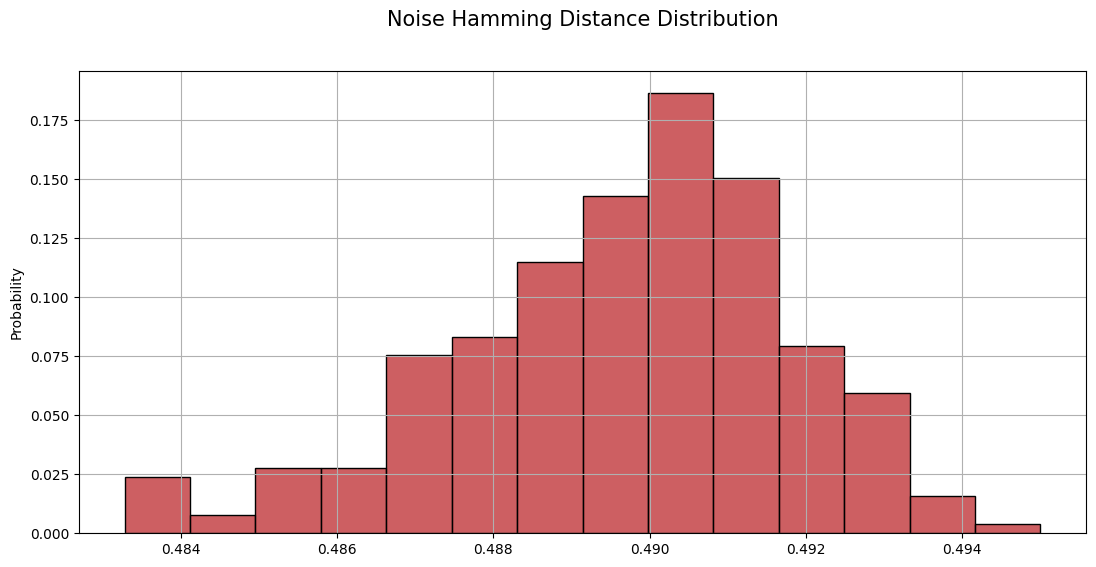

In [8]:
plt.figure(figsize=(13,6))
sns.histplot(derived_noise, stat='probability', color='#BD2A2E')
plt.title('Noise Hamming Distance Distribution', fontsize=15, y=1.08)
plt.grid()
plt.show()

In [11]:
def calculate_distribution(data, num_bins=100):
    '''
    Calculates the distribution of data using a histogram, returning the midpoints of bins and corresponding probabilities.
    '''
    counts, bin_edges = np.histogram(data, bins=num_bins, density=True)
    midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2
    probabilities = counts / np.sum(counts)
    return midpoints, probabilities

midpoints, probabilities = calculate_distribution(derived_noise)
def sample_from_distribution(sample_size, midpoints=midpoints, probabilities=probabilities):
    '''
    Samples values from a given distribution based on provided midpoints and probabilities.
    '''
    return np.random.choice(midpoints, size=sample_size, p=probabilities)

In [10]:
sample_from_distribution(10)

array([0.49224609, 0.48966797, 0.48697266, 0.48861328, 0.49154297,
       0.49306641, 0.49318359, 0.49037109, 0.49130859, 0.49154297])